**Chapter 01. 데이터 전처리**

In [1]:
import csv
from hashlib import algorithms_available

f = open("Fish.csv")
data = csv.reader(f)

header = next(data)

bream_weight = []
bream_length = []

smelt_weight = []
smelt_length = []

for row in data:
    row[1] = float(row[1])
    row[3] = float(row[3])

    if(row[0] == "Bream"):
        bream_weight.append(row[1])
        bream_length.append(row[3])
    elif(row[0] == "Smelt"):
        smelt_weight.append(row[1])
        smelt_length.append(row[3])

f.close()

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

print(weight)
print(length)

[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]


In [3]:
import numpy as np

x = np.column_stack((length, weight))
print(x.shape)
print(x[:9])

(49, 2)
[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]
 [ 29.7 450. ]
 [ 29.7 500. ]
 [ 30.  390. ]
 [ 30.  450. ]]


In [9]:

print(np.ones(35))
print(np.zeros(14))

y = np.concatenate( (np.ones(35), np.zeros(14)) )
#print(y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)


print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(36, 2) (13, 2)
(36,) (13,)


In [15]:
print("Training: Set:", y_train)
print("Test Set:     ", y_test)

Training: Set: [1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
Test Set:      [1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    stratify=y, #y값을넣어주면.. 모종의 이유가 있지 않다면 던져줘요. 계층화하다.
                                                    random_state = 42)

print("Test Set:", y_test)

Test Set: [0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
from sklearn.neighbors import KNeighborsClassifier


kn = KNeighborsClassifier()
kn.fit(x_train, y_train)




,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [18]:
result = kn.score(x_test, y_test)
print(result)

1.0


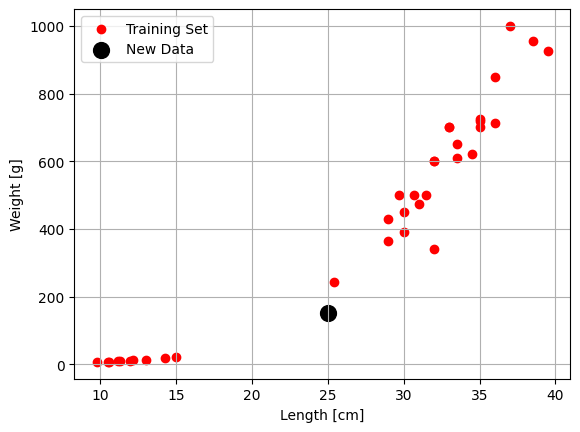

In [22]:
import matplotlib.pyplot as plt

plt.figure()

plt.scatter(x_train[:35, 0], x_train[0:35, 1],c='red', label="Training Set")
#plt.scatter(x_test[:14, 0], x_test[0:14, 1],c='blue', label="Test Set")

#plt.scatter(x_test[0:14, 0], x_test[0:14, 1])

# x_new = [25, 150]
plt.scatter(25, 150, c="black", s=130, label="New Data")
plt.legend()    #n. 전설, 범례

plt.xlabel('Length [cm]')
plt.ylabel('Weight [g]')
plt.grid()

plt.show()

In [23]:
#사람: x_new ---> y_pred: 1(도미)

y_pred = kn.predict([[25, 150]])
print(y_pred)

[0.]


[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


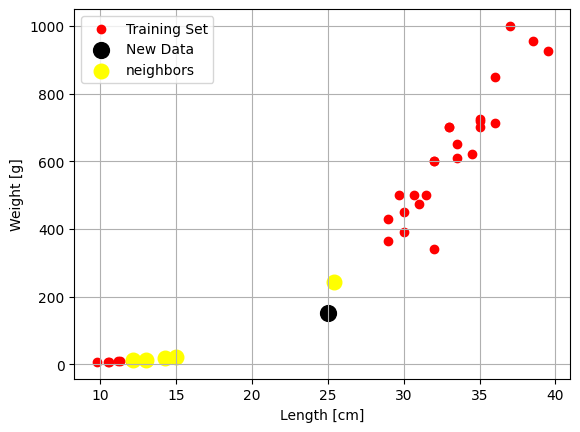

In [27]:
distances, indexes = kn.kneighbors([[25, 150]])

print(distances)
print(indexes)

import matplotlib.pyplot as plt

plt.figure()

plt.scatter(x_train[:35, 0], x_train[0:35, 1],c='red', label="Training Set")
#plt.scatter(x_test[:14, 0], x_test[0:14, 1],c='blue', label="Test Set")

#plt.scatter(x_test[0:14, 0], x_test[0:14, 1])

# x_new = [25, 150]
plt.scatter(25, 150, c="black", s=130, label="New Data")
plt.scatter(x_train[indexes, 0],x_train[indexes, 1], c="yellow", s=110, label="neighbors")
plt.legend()
plt.xlabel('Length [cm]')

plt.legend()    #n. 전설, 범례

plt.xlabel('Length [cm]')
plt.ylabel('Weight [g]')
plt.grid()

plt.show()

In [28]:
print(x_train[indexes, :])


[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [30]:
print(y_train[indexes])

[[1. 0. 0. 0. 0.]]


[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


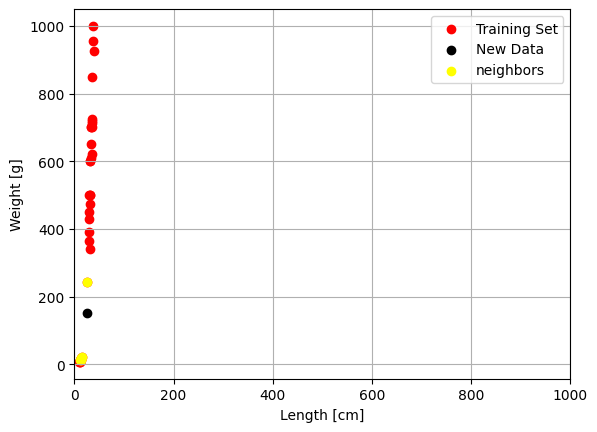

In [32]:
distances, indexes = kn.kneighbors([[25, 150]])

print(distances)
print(indexes)

import matplotlib.pyplot as plt

plt.figure()

plt.scatter(x_train[:35, 0], x_train[0:35, 1],c='red', label="Training Set")
#plt.scatter(x_test[:14, 0], x_test[0:14, 1],c='blue', label="Test Set")

#plt.scatter(x_test[0:14, 0], x_test[0:14, 1])

# x_new = [25, 150]
plt.scatter(25, 150, c="black", label="New Data")
plt.scatter(x_train[indexes, 0],x_train[indexes, 1], c="yellow", label="neighbors")



plt.xlim([0, 1000])

plt.legend()
plt.xlabel('Length [cm]')

plt.legend()    #n. 전설, 범례

plt.xlabel('Length [cm]')
plt.ylabel('Weight [g]')
plt.grid()

plt.show()

In [36]:
#Feature Scaling ---> Standardization (표준화) --> z-score


mean = np.mean(x_train, axis = 0) #axis값을 잘 체크하라!!
std = np.std(x_train, axis=0) #standard deviation

print("평균:", mean)
print("표준편차:", std)

print(x_train[:5, :])

평균: [ 27.29722222 454.09722222]
표준편차: [  9.98244253 323.29893931]
[[ 29.7 500. ]
 [ 12.2  12.2]
 [ 33.  700. ]
 [ 11.3   8.7]
 [ 39.5 925. ]]


In [40]:
print("before:\n",x_train[:3, :])

before:
 [[ 29.7 500. ]
 [ 12.2  12.2]
 [ 33.  700. ]]


In [41]:
x_train_scaled = (x_train - mean) / std

print("after:\n",x_train_scaled[:3, :])

after:
 [[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]]


**Chapter 02: 전처리 데이터로 모델 학습시키기**


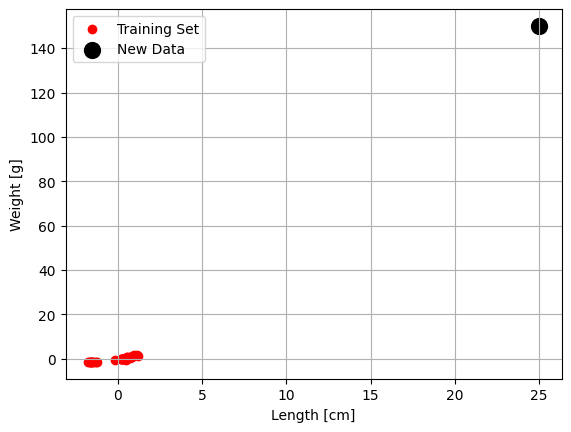

In [43]:

plt.figure()

plt.scatter(x_train_scaled[:35, 0], x_train_scaled[0:35, 1],c='red', label="Training Set")

# x_new = [25, 150]
plt.scatter(25, 150, c="black", s=130, label="New Data")

plt.legend()
plt.xlabel('Length [cm]')

plt.legend()    #n. 전설, 범례

plt.xlabel('Length [cm]')
plt.ylabel('Weight [g]')
plt.grid()

plt.show()


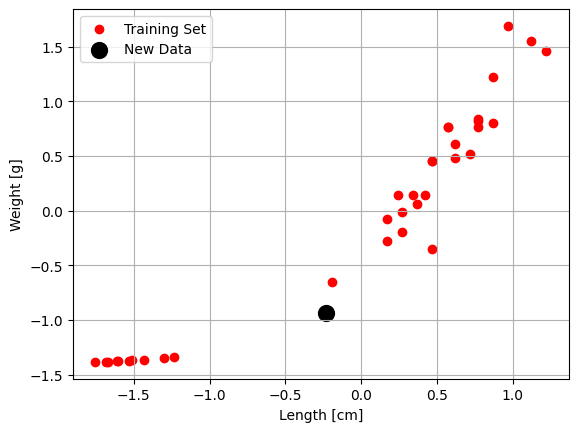

In [44]:
x_new = ([25, 150] - mean) / std
plt.figure()

plt.scatter(x_train_scaled[:35, 0], x_train_scaled[0:35, 1],c='red', label="Training Set")

# x_new = [25, 150]
plt.scatter(x_new[0], x_new[1], c="black", s=130, label="New Data")

plt.legend()
plt.xlabel('Length [cm]')

plt.legend()    #n. 전설, 범례

plt.xlabel('Length [cm]')
plt.ylabel('Weight [g]')
plt.grid()

plt.show()


In [45]:
kn.fit(x_train_scaled, y_train)

x_test_scaled = (x_test - mean) / std

result = kn.score(x_test_scaled, y_test)
print(result)

1.0


In [46]:
#사람: x_new ---> y_pred: 1(도미)

y_pred = kn.predict([x_new])
print(y_pred) # 도미로 예측! ! ! ! !  ! ! ! ! ! !  ! !! !

[1.]


[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]]
[[21 14 34 32  5]]


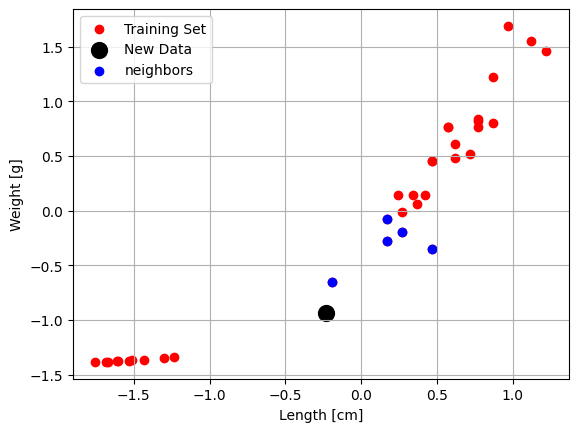

In [48]:

distances, indexes = kn.kneighbors([x_new])

print(distances)
print(indexes)



plt.figure()

plt.scatter(x_train_scaled[:35, 0], x_train_scaled[0:35, 1],c='red', label="Training Set")
plt.scatter(x_new[0], x_new[1], c="black", s=130, label="New Data")
plt.scatter(x_train_scaled[indexes, 0], x_train_scaled[indexes, 1], c="blue", label="neighbors")

plt.legend()
plt.xlabel('Length [cm]')

plt.legend()    #n. 전설, 범례

plt.xlabel('Length [cm]')
plt.ylabel('Weight [g]')
plt.grid()

plt.show()
